In [1]:
import torch
from pathlib import Path

import sys
sys.path.append("..")

save_path = Path("../models/autoencoder_model.pth")

if not save_path.exists():
    raise FileNotFoundError(f"Model file not found at {save_path}")


Input shape: torch.Size([1, 2048]), Output shape: torch.Size([1, 1, 2048])


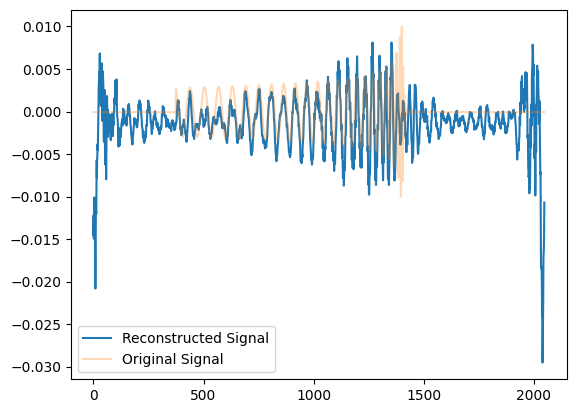

Input shape: torch.Size([1, 2048]), Output shape: torch.Size([1, 1, 2048])


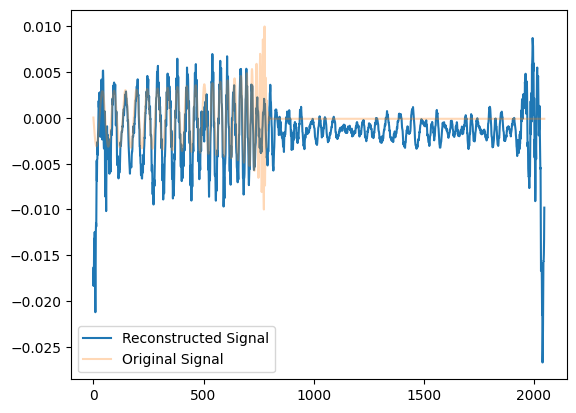

Input shape: torch.Size([1, 2048]), Output shape: torch.Size([1, 1, 2048])


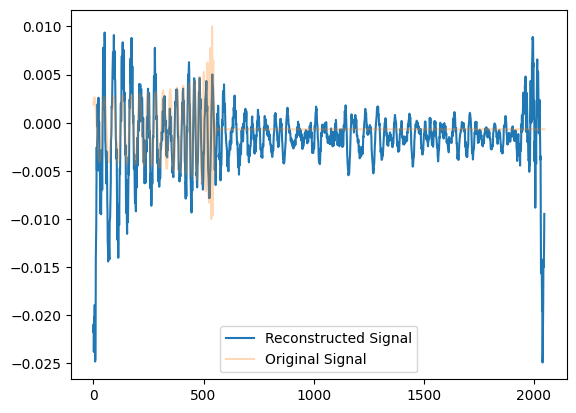

Input shape: torch.Size([1, 2048]), Output shape: torch.Size([1, 1, 2048])


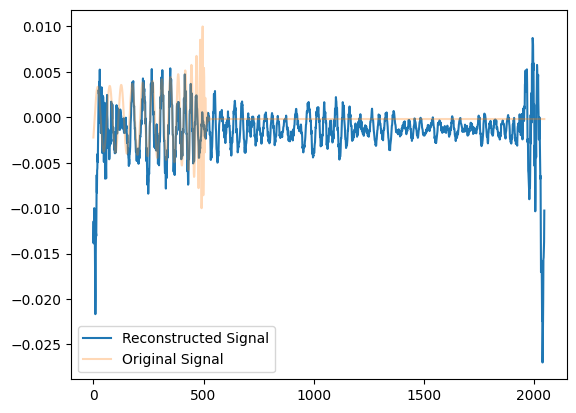

Input shape: torch.Size([1, 2048]), Output shape: torch.Size([1, 1, 2048])


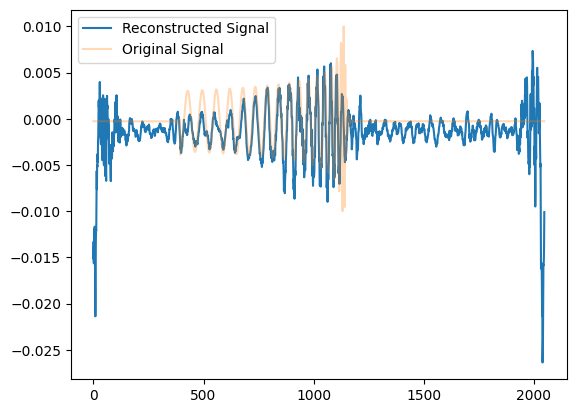

Input shape: torch.Size([1, 2048]), Output shape: torch.Size([1, 1, 2048])


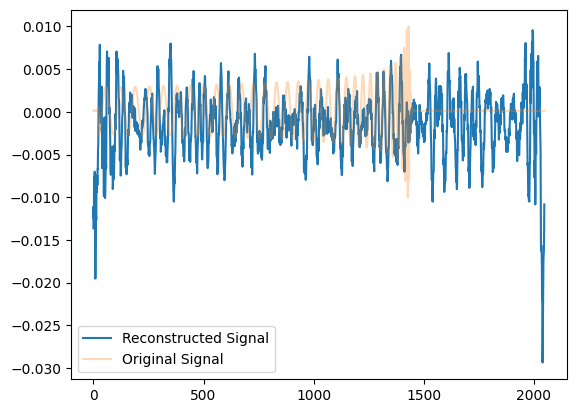

Input shape: torch.Size([1, 2048]), Output shape: torch.Size([1, 1, 2048])


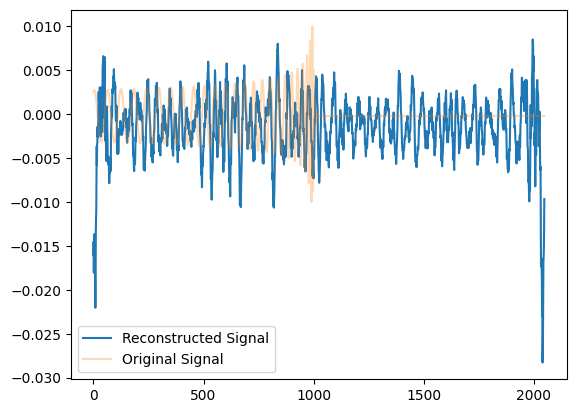

Input shape: torch.Size([1, 2048]), Output shape: torch.Size([1, 1, 2048])


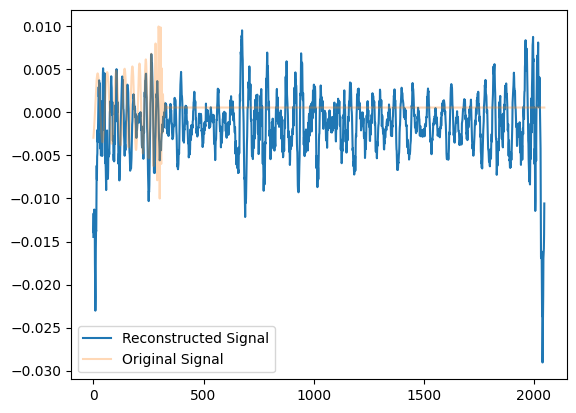

Input shape: torch.Size([1, 2048]), Output shape: torch.Size([1, 1, 2048])


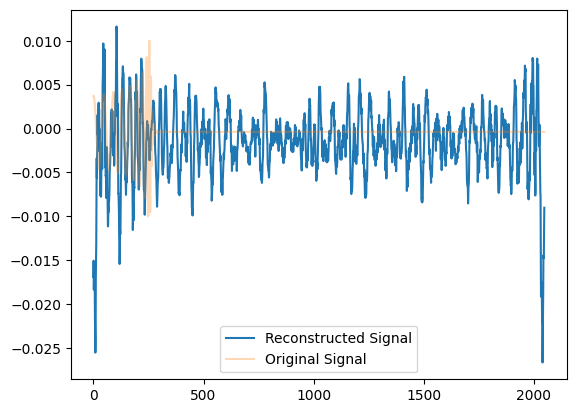

Input shape: torch.Size([1, 2048]), Output shape: torch.Size([1, 1, 2048])


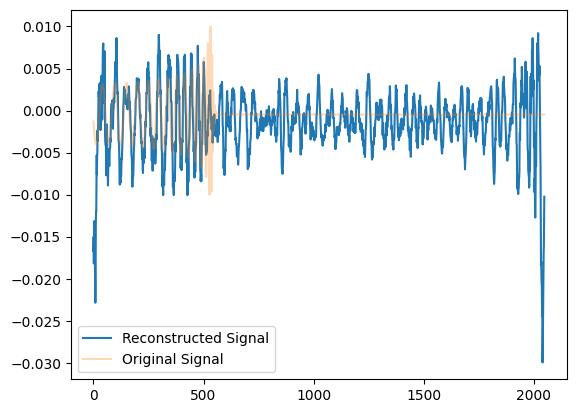

In [3]:
from src.data import GravWaveDataset
from src.models import AutoEncoder
import matplotlib.pyplot as plt
import json

Path("./configs/models").mkdir(parents=True, exist_ok=True)
encoder_config = json.load(open("../configs/models/encoder.json"))
decoder_config = json.load(open("../configs/models/decoder.json"))

model = AutoEncoder(encoder_config, decoder_config)
model.load_state_dict(torch.load(save_path))
model.eval()

dataset = GravWaveDataset(10, 1, False, True)

for data, target in dataset:
    data = data.unsqueeze(0)  # Add batch dimension
    output = model(data)
    print(f"Input shape: {data.shape}, Output shape: {output.shape}")

    plt.plot(output.detach().squeeze().numpy(), label='Reconstructed Signal')
    plt.plot(target.detach().squeeze().numpy() / 100, label='Original Signal', alpha=0.3)
    plt.legend()

    plt.show()
    

